# WALMART STORE SALES PREDICTION - FORECASTING 

In [1]:
import warnings

In [98]:
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling
from pylab import rcParams

from datetime import datetime as dt

%matplotlib inline
sns.set_style("whitegrid")
rcParams['figure.figsize']=8,5

## 1. Imorting the datasets
    - stores.csv
    - train.csv
    - test.csv
    - features.csv

In [3]:
stores = pd.read_csv('data/stores.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
feature = pd.read_csv('data/features.csv')

In [4]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [5]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [6]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [7]:
test.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


    - Since, the datasets "stores" , "features"  are common for the train and test datasets
        - we will combine them with both test and train to get merged datasets

In [8]:
train = pd.merge(stores,train)
train = pd.merge(train,feature)

In [9]:
train.head(2)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [10]:
test = pd.merge(stores,test)
test = pd.merge(test,feature)

In [11]:
test.head(2)

,Store,Type,Size,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,A,151315,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [12]:
train.dtypes

Store             int64
Type             object
Size              int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [13]:
test.dtypes

Store             int64
Type             object
Size              int64
Dept              int64
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

## 2. Data Preprocessing

### A. Date datatype
    i.    - Since, the date columns is of "object" type
            - convert that to datetime type

In [14]:
train['Date']=[dt.strptime(x,'%Y-%m-%d') for x in list(train['Date'])]

In [15]:
test['Date']=[dt.strptime(x,'%Y-%m-%d') for x in list(test['Date'])]

In [16]:
train['Date'].value_counts().count()

143

    ii.    - create new features for date

In [17]:
train['Week'] =train['Date'].dt.week
train['Month'] =train['Date'].dt.month 
train['Year'] =train['Date'].dt.year
train['Date'] =train['Date']

In [45]:
test['Week'] =test['Date'].dt.week
test['Month'] =test['Date'].dt.month 
test['Year'] =test['Date'].dt.year
test['Date'] =test['Date']

In [18]:
train.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Week,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010


### B.Missing Value treatment

In [19]:
train.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Week                 0
Month                0
Year                 0
dtype: int64

In [20]:
test.isnull().sum()

Store               0
Type                0
Size                0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

    - Impute CPI,Unemployment with mean

In [21]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

    - Impute msissing markdowns with 0
        - i.e. no markdown

In [22]:
train=train.fillna(0)
test=test.fillna(0)

### C. Creating dummy variables

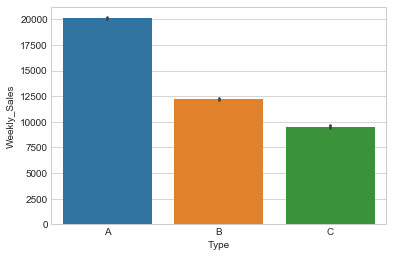

In [23]:
sns.barplot(x='Type',y='Weekly_Sales',data=train)

    - Type A has maximum sales while type C has minimum

In [24]:
train = pd.get_dummies(train)

In [46]:
test = pd.get_dummies(test)

## 3. Exploratory Data Analysis

#### which store has highest overall sale entries?

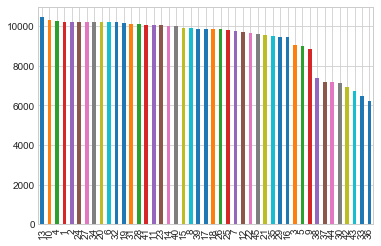

In [25]:
train['Store'].value_counts().plot(kind = 'bar')

 - there are more sales in Store 13

### Bi-variate analysis

#### which store has highest weekly sales?

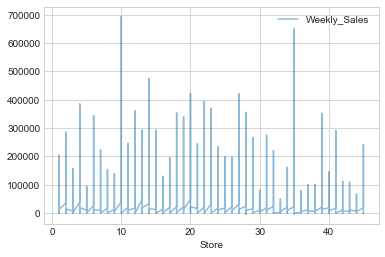

In [26]:
train.plot(y='Weekly_Sales', x='Store', alpha=0.5)

    - In terms of weekly sales,
        -Store 10 has highest 
        - while store 44 has lowest

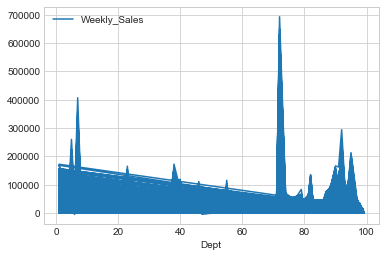

In [27]:
train.plot(x='Dept',y='Weekly_Sales')

    - Dept wise maximum sales lies between Dept 70 -80

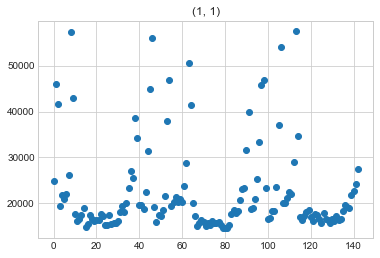

In [28]:
for name, group in train.groupby(["Store", "Dept"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break


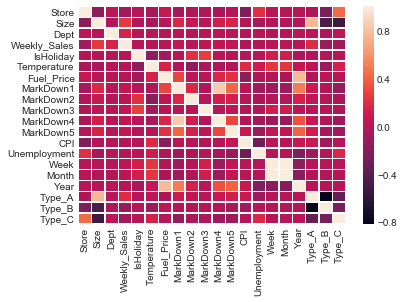

In [29]:
sns.heatmap(train.corr(),linewidths=0.5)

        - here, we can see that markdown 4 is highly corelated to markdown 1

#### How are sales different for each store?

In [30]:
df = train.groupby(['Store','Date','IsHoliday'])['Weekly_Sales'].agg(np.mean).to_frame().reset_index()

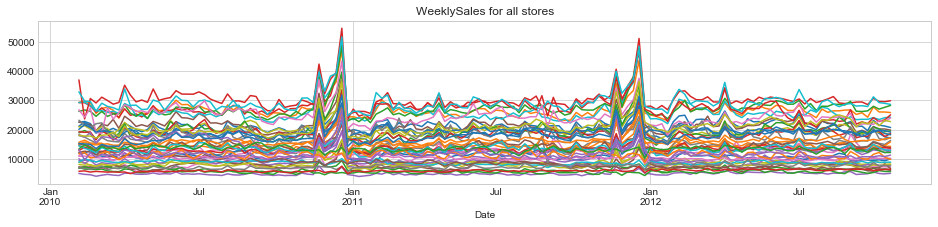

In [31]:
ax= df.pivot(index='Date', columns='Store', values='Weekly_Sales').plot(figsize=(16,3), title="WeeklySales for all stores")
ax.legend([])
plt.show()

    - The sale pattern for all stores is similar

#### Is there any correlation between holidays and sales?
    -Summing the overall sale of all stores together

In [32]:
holidays = sorted(df.query('IsHoliday==True').Date.unique())

In [33]:
ts = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [34]:
ts = ts.set_index('Date')

In [35]:
ts.index.name = 'Date'

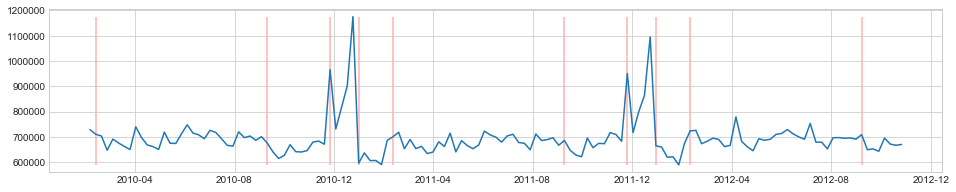

In [36]:
plt.figure(figsize=(16,3))
plt.plot(ts)
ymin,ymax = ts.min(),ts.max()
plt.vlines(holidays,ymin=ymin,ymax=ymax-1,color='#ffb0b0')

    - It can be observed that the sales are high during the end of each year
        - Christmas and Thanksgiving have a definite impact on sales.

#### What's the overall distribution of sales?

In [37]:
dfsales = df[['Store','Weekly_Sales']].groupby('Store').mean().reset_index().sort_values('Weekly_Sales')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


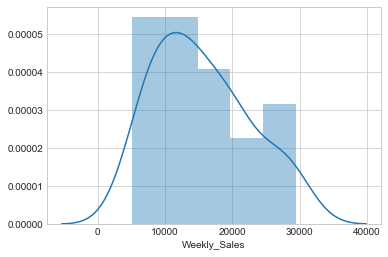

In [38]:
sns.distplot(dfsales.Weekly_Sales)

    - distribution is normal

#### Is time series stationary?

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput,dftest)
    
    if dfoutput[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

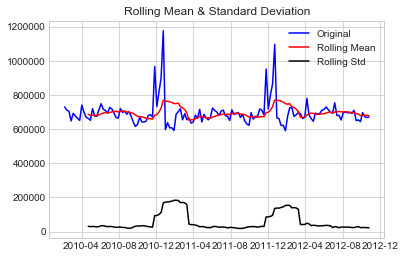

Results of Dickey-Fuller Test:
Test Statistic                -5.917227e+00
p-value                        2.555832e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.917227381992244, 2.555831817876817e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3221.0384257409314)
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [40]:
test_stationarity(ts['Weekly_Sales'])

#### is there any seasonlaity in the data?

To determine the forecast a time series, it needs to be stationary. Adfuller test helps us in determining the stationarity of time sereis

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

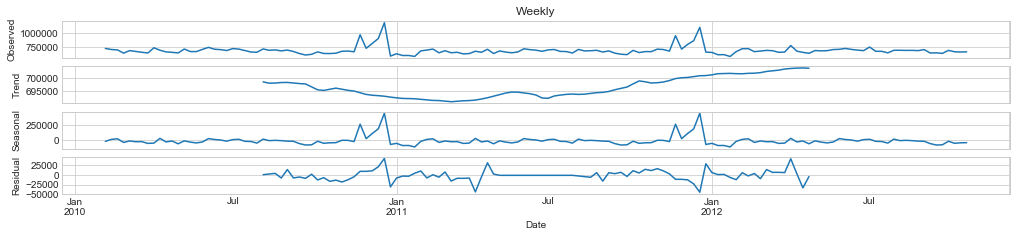

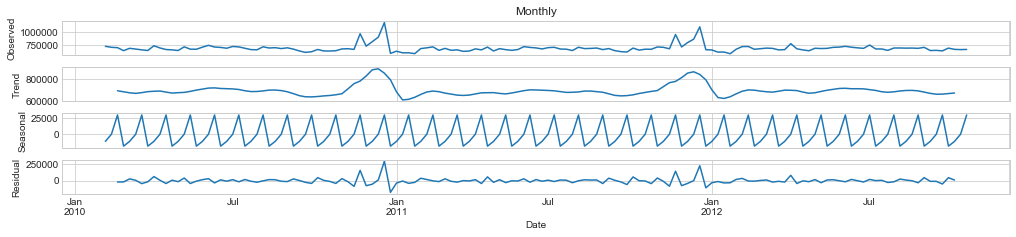

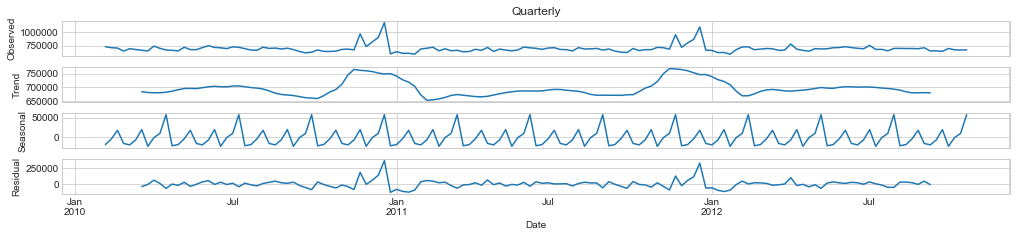

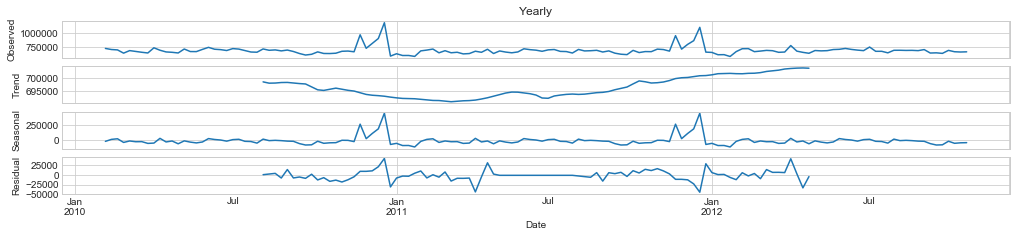

In [42]:
res = seasonal_decompose(ts['Weekly_Sales'])
fig = res.plot()
fig.set_size_inches(16,3)
fig.get_axes()[0].set_title('Weekly')
plt.show()

res = seasonal_decompose(ts['Weekly_Sales'], freq=4)
fig = res.plot()
fig.set_size_inches(16,3)
fig.get_axes()[0].set_title('Monthly')
plt.show()

res = seasonal_decompose(ts['Weekly_Sales'], freq=12)
fig = res.plot()
fig.set_size_inches(16,3)
fig.get_axes()[0].set_title('Quarterly')
plt.show()

res = seasonal_decompose(ts['Weekly_Sales'], freq=52)
fig = res.plot()
fig.set_size_inches(16,3)
fig.get_axes()[0].set_title('Yearly')
plt.show()

## Lets first of all find out the effect of different types of parameters on sales of different stores

### Feature Selection

In [60]:
target = train['Weekly_Sales']

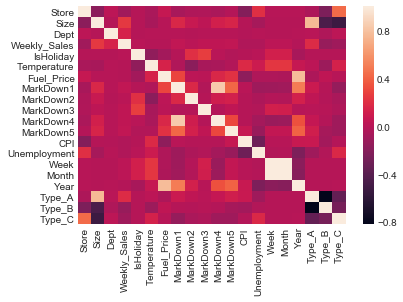

In [61]:
sns.heatmap(train.corr())

In [62]:
train.columns

Index(['Store', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Week', 'Month',
       'Year', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

In [69]:
features = train.drop(columns=['Weekly_Sales'])

    since we know that markdown 4 is highly correlated with markdown 1,
    we will remove markdown 4
    
    fuel_price is highly correlated with year
    drop year
    
    month is correlated with week
    drop month

In [71]:
features = features.drop(columns=['MarkDown4','Date','Year','Month'])

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.18, random_state=1)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
rfr.score(X_test, y_test)

0.9739151040311314

In [86]:
feature_importance = pd.DataFrame(list(zip(features.columns, rfr.feature_importances_)))

In [87]:
feature_importance

,0,1
0,Store,0.055611
1,Size,0.189939
2,Dept,0.627529
3,IsHoliday,0.001318
4,Temperature,0.010661
5,Fuel_Price,0.004918
6,MarkDown1,0.001626
7,MarkDown2,0.001321
8,MarkDown3,0.008118
9,MarkDown5,0.001917


In [88]:
feature_importance.rename(columns={0:'feature',1:'coeff'},inplace=True)

In [89]:
feature_importance.sort_values(by=['coeff'],ascending=False,axis=0)

,feature,coeff
2,Dept,0.627529
1,Size,0.189939
0,Store,0.055611
12,Week,0.044235
10,CPI,0.027359
11,Unemployment,0.011478
14,Type_B,0.010742
4,Temperature,0.010661
8,MarkDown3,0.008118
5,Fuel_Price,0.004918


    -The Department and Size of the Store matter a lot to the Weekly Sales. 
        -This is followed by Store,Week, CPI, Unemployment,Temperature and Fuel Price. 
            -Type B stores seem to have more sales as compared to Type A or Type C stores.
                -Also MarkDown 3 has the most impact on the sales as compared to other markdowns
    
    Other features don't seem to have a significant impact on the weekly sales

In [92]:
predict_sales=rfr.predict(test.drop(columns=['MarkDown4','Date','Year','Month']))

In [95]:
Weekly_Sales = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": predict_sales
    })


In [99]:
Weekly_Sales.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,32531.181
1,1_2_2012-11-02,44733.778
2,1_3_2012-11-02,8928.687
3,1_4_2012-11-02,38654.606
4,1_5_2012-11-02,26177.056
